##  data analyse


In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('./trainforvg.csv')

In [21]:
data.head()

,Unnamed: 0,acc_max,gyro_max,acc_kurtosis,gyro_kurtosis,label,lin_max,acc_skewness,gyro_skewness,post_gyro_max,post_lin_max,fall
0,661,26.039919,7.309797,20.378162,2.782476,SDL,11.131080,3.891361,1.592927,7.086618,10.790400,1
1,122,25.864500,6.511954,14.187190,5.324864,FOL,7.945561,3.022175,2.376939,6.325522,7.719352,1
2,113,27.524501,12.944099,31.855926,22.891186,FOL,14.454818,4.849024,4.283890,12.888111,14.368784,1
3,14,30.647705,11.694868,23.608764,9.287735,FOL,15.228303,3.921537,2.794609,11.549971,14.944151,1
4,529,26.373917,11.168424,14.318453,15.983202,FKL,10.007396,3.087975,3.363557,11.057636,9.753058,1


## Abbreviation
- acc_max: Gia toc max
- acc_kurtosis: Bien dong cao nhat ( Shape )
- acc_skewness: Do lech du lieu ( Xu huong cua gia toc )
- gyro_max: Toc do quay max
- gyro_kurtosis: 
- gyro_skewness: 
- lin_max: Gia toc lon nhat o giay thu 4
- post_lin_max: Gia toc tuyen tinh lon nhat o giay thu 6
- post_gyro_max: ***: Gia toc tuyen tinh sau 6s, if = 0 => Stroke 
- fall: 1 and not fall is 0
- label: nhan cua activity

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1428 non-null   int64  
 1   acc_max        1428 non-null   float64
 2   gyro_max       1428 non-null   float64
 3   acc_kurtosis   1428 non-null   float64
 4   gyro_kurtosis  1428 non-null   float64
 5   label          1428 non-null   object 
 6   lin_max        1428 non-null   float64
 7   acc_skewness   1428 non-null   float64
 8   gyro_skewness  1428 non-null   float64
 9   post_gyro_max  1428 non-null   float64
 10  post_lin_max   1428 non-null   float64
 11  fall           1428 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 134.0+ KB


In [25]:
data.columns
data.drop(columns = 'Unnamed: 0', inplace = True)

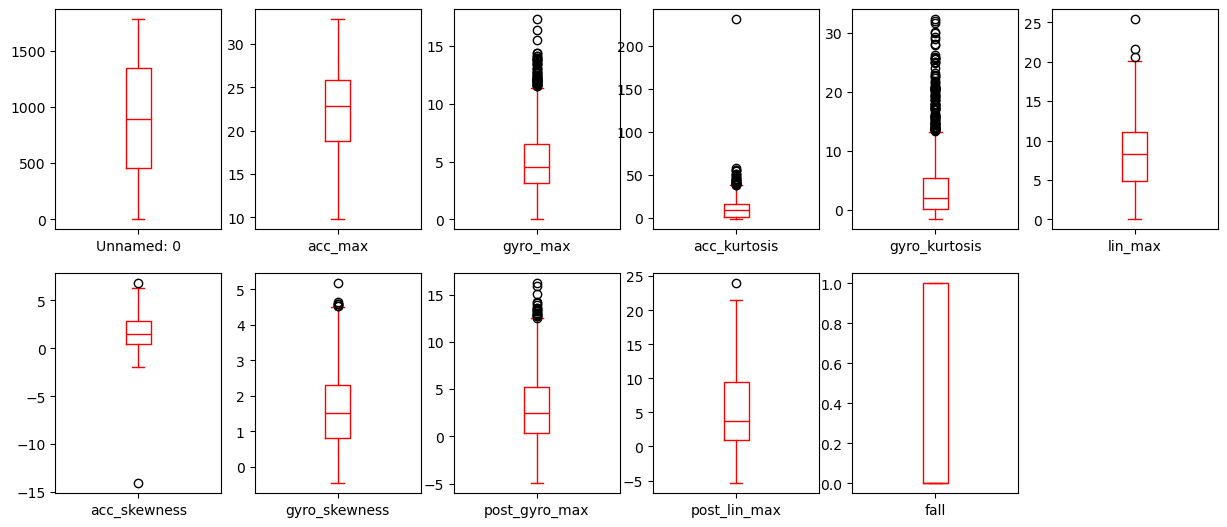

In [16]:
data.plot(kind = 'box', subplots = True, layout = (6,6),
         sharex = False, sharey = False, figsize = (15,20),
         color = 'red' );


In [23]:
print(f' Shape of dataset: {data.shape}')

 Shape of dataset: (1428, 12)


In [27]:
#choose feature:
features = data.drop(columns =  ['fall', 'label'])
features

,acc_max,gyro_max,acc_kurtosis,gyro_kurtosis,lin_max,acc_skewness,gyro_skewness,post_gyro_max,post_lin_max
0,26.039919,7.309797,20.378162,2.782476,11.131080,3.891361,1.592927,7.086618,10.790400
1,25.864500,6.511954,14.187190,5.324864,7.945561,3.022175,2.376939,6.325522,7.719352
2,27.524501,12.944099,31.855926,22.891186,14.454818,4.849024,4.283890,12.888111,14.368784
3,30.647705,11.694868,23.608764,9.287735,15.228303,3.921537,2.794609,11.549971,14.944151
4,26.373917,11.168424,14.318453,15.983202,10.007396,3.087975,3.363557,11.057636,9.753058
...,...,...,...,...,...,...,...,...,...
1423,9.997262,0.039835,0.193545,0.022826,0.053063,0.003216,0.132977,0.001416,0.002612
1424,25.917910,11.347815,-0.996787,0.637958,16.898301,0.199294,0.808652,3.385675,1.724883
1425,12.098892,2.083724,1.745597,-0.874214,1.291914,-0.307109,0.424739,1.860753,0.861876
1426,20.079536,4.770095,0.020741,-1.087583,6.476275,0.344870,0.311172,0.243046,0.995053


In [31]:
target = data['fall']
target

0       1
1       1
2       1
3       1
4       1
       ..
1423    0
1424    0
1425    0
1426    0
1427    0
Name: fall, Length: 1428, dtype: int64

## feature selection 


In [40]:
from sklearn.feature_selection import mutual_info_regression
def make_muin_scores (features, target):
    muin_scores = mutual_info_regression(features, target, discrete_features = False)
    muin_scores = pd.Series(muin_scores, name = 'Muin Scores', index = features.columns)
    muin_scores = muin_scores.sort_values(ascending = False )
    return muin_scores
muin_scores = make_muin_scores (features, target)
muin_scores

post_lin_max     0.561425
post_gyro_max    0.458987
acc_skewness     0.422832
acc_kurtosis     0.381489
gyro_skewness    0.319572
gyro_kurtosis    0.255519
acc_max          0.249849
lin_max          0.217938
gyro_max         0.157480
Name: Muin Scores, dtype: float64

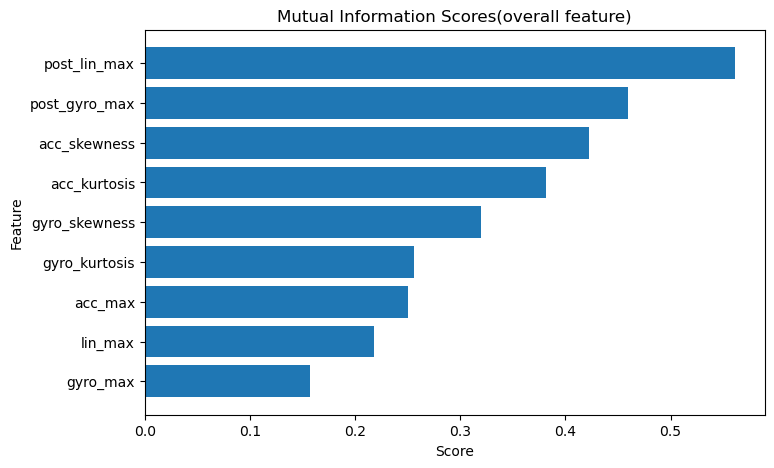

In [43]:
def plot_muin_scores (scores):
    y_tempt = scores.sort_values(ascending = True)
    width = np.arange(len(y_tempt))
    ticks = list(y_tempt.index)
    plt.barh(width, y_tempt)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores(overall feature)")

plt.figure(dpi=100, figsize=(8, 5))
plt.xlabel("Score")
plt.ylabel("Feature")
plot_muin_scores(muin_scores)
    

## Observations:
- post_lin_max and post_gyro_max has the highest relevants to target 'fall'
- gyro_max has the least relevant to target (value < 0.2)
-> drop the variable gyro_max !!!

In [45]:
features.drop(columns = 'gyro_max', inplace = True)

- The distinction between post_lin_max abd post_gyro_max 

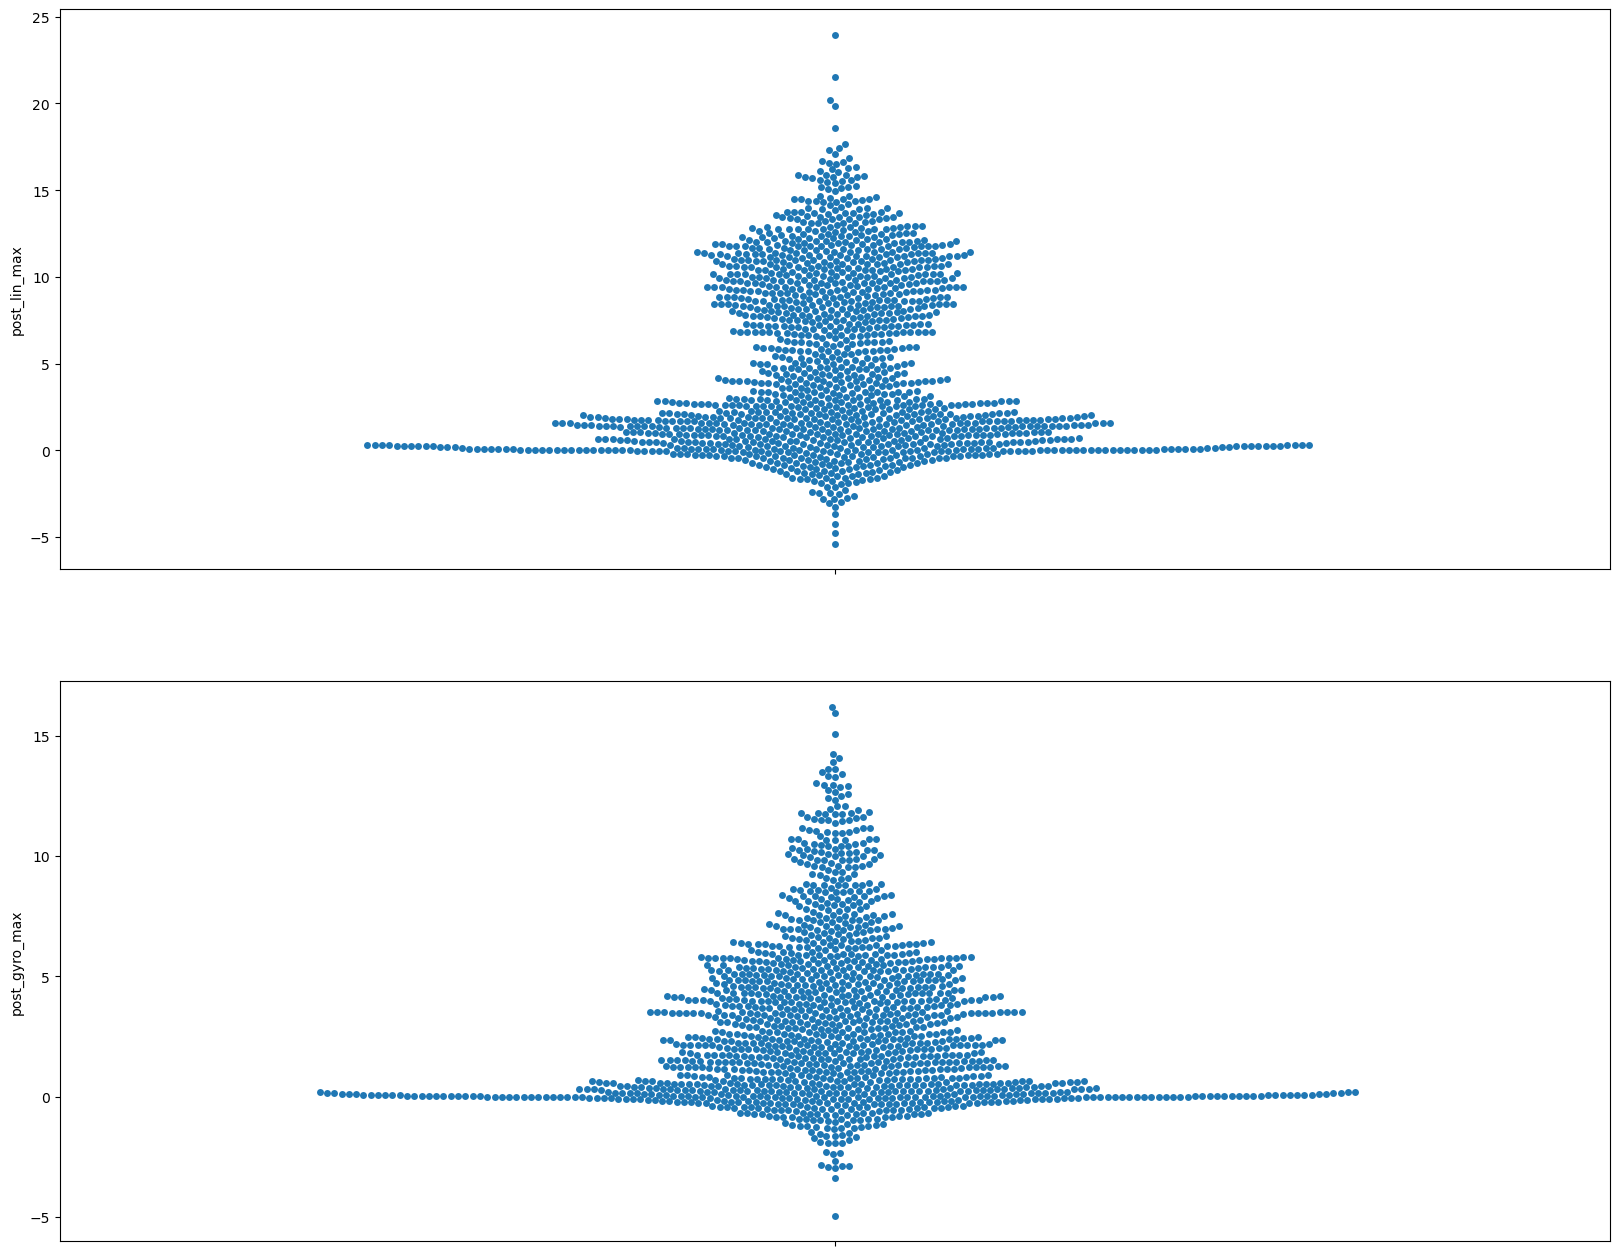

In [53]:
fg, ax = plt.subplots(2, figsize = (20,16))

import seaborn as sns
sns.swarmplot(y = features['post_lin_max'], ax = ax[0])
sns.swarmplot(y = features.post_gyro_max, ax = ax[1]);


## see the distrbution of every type of data

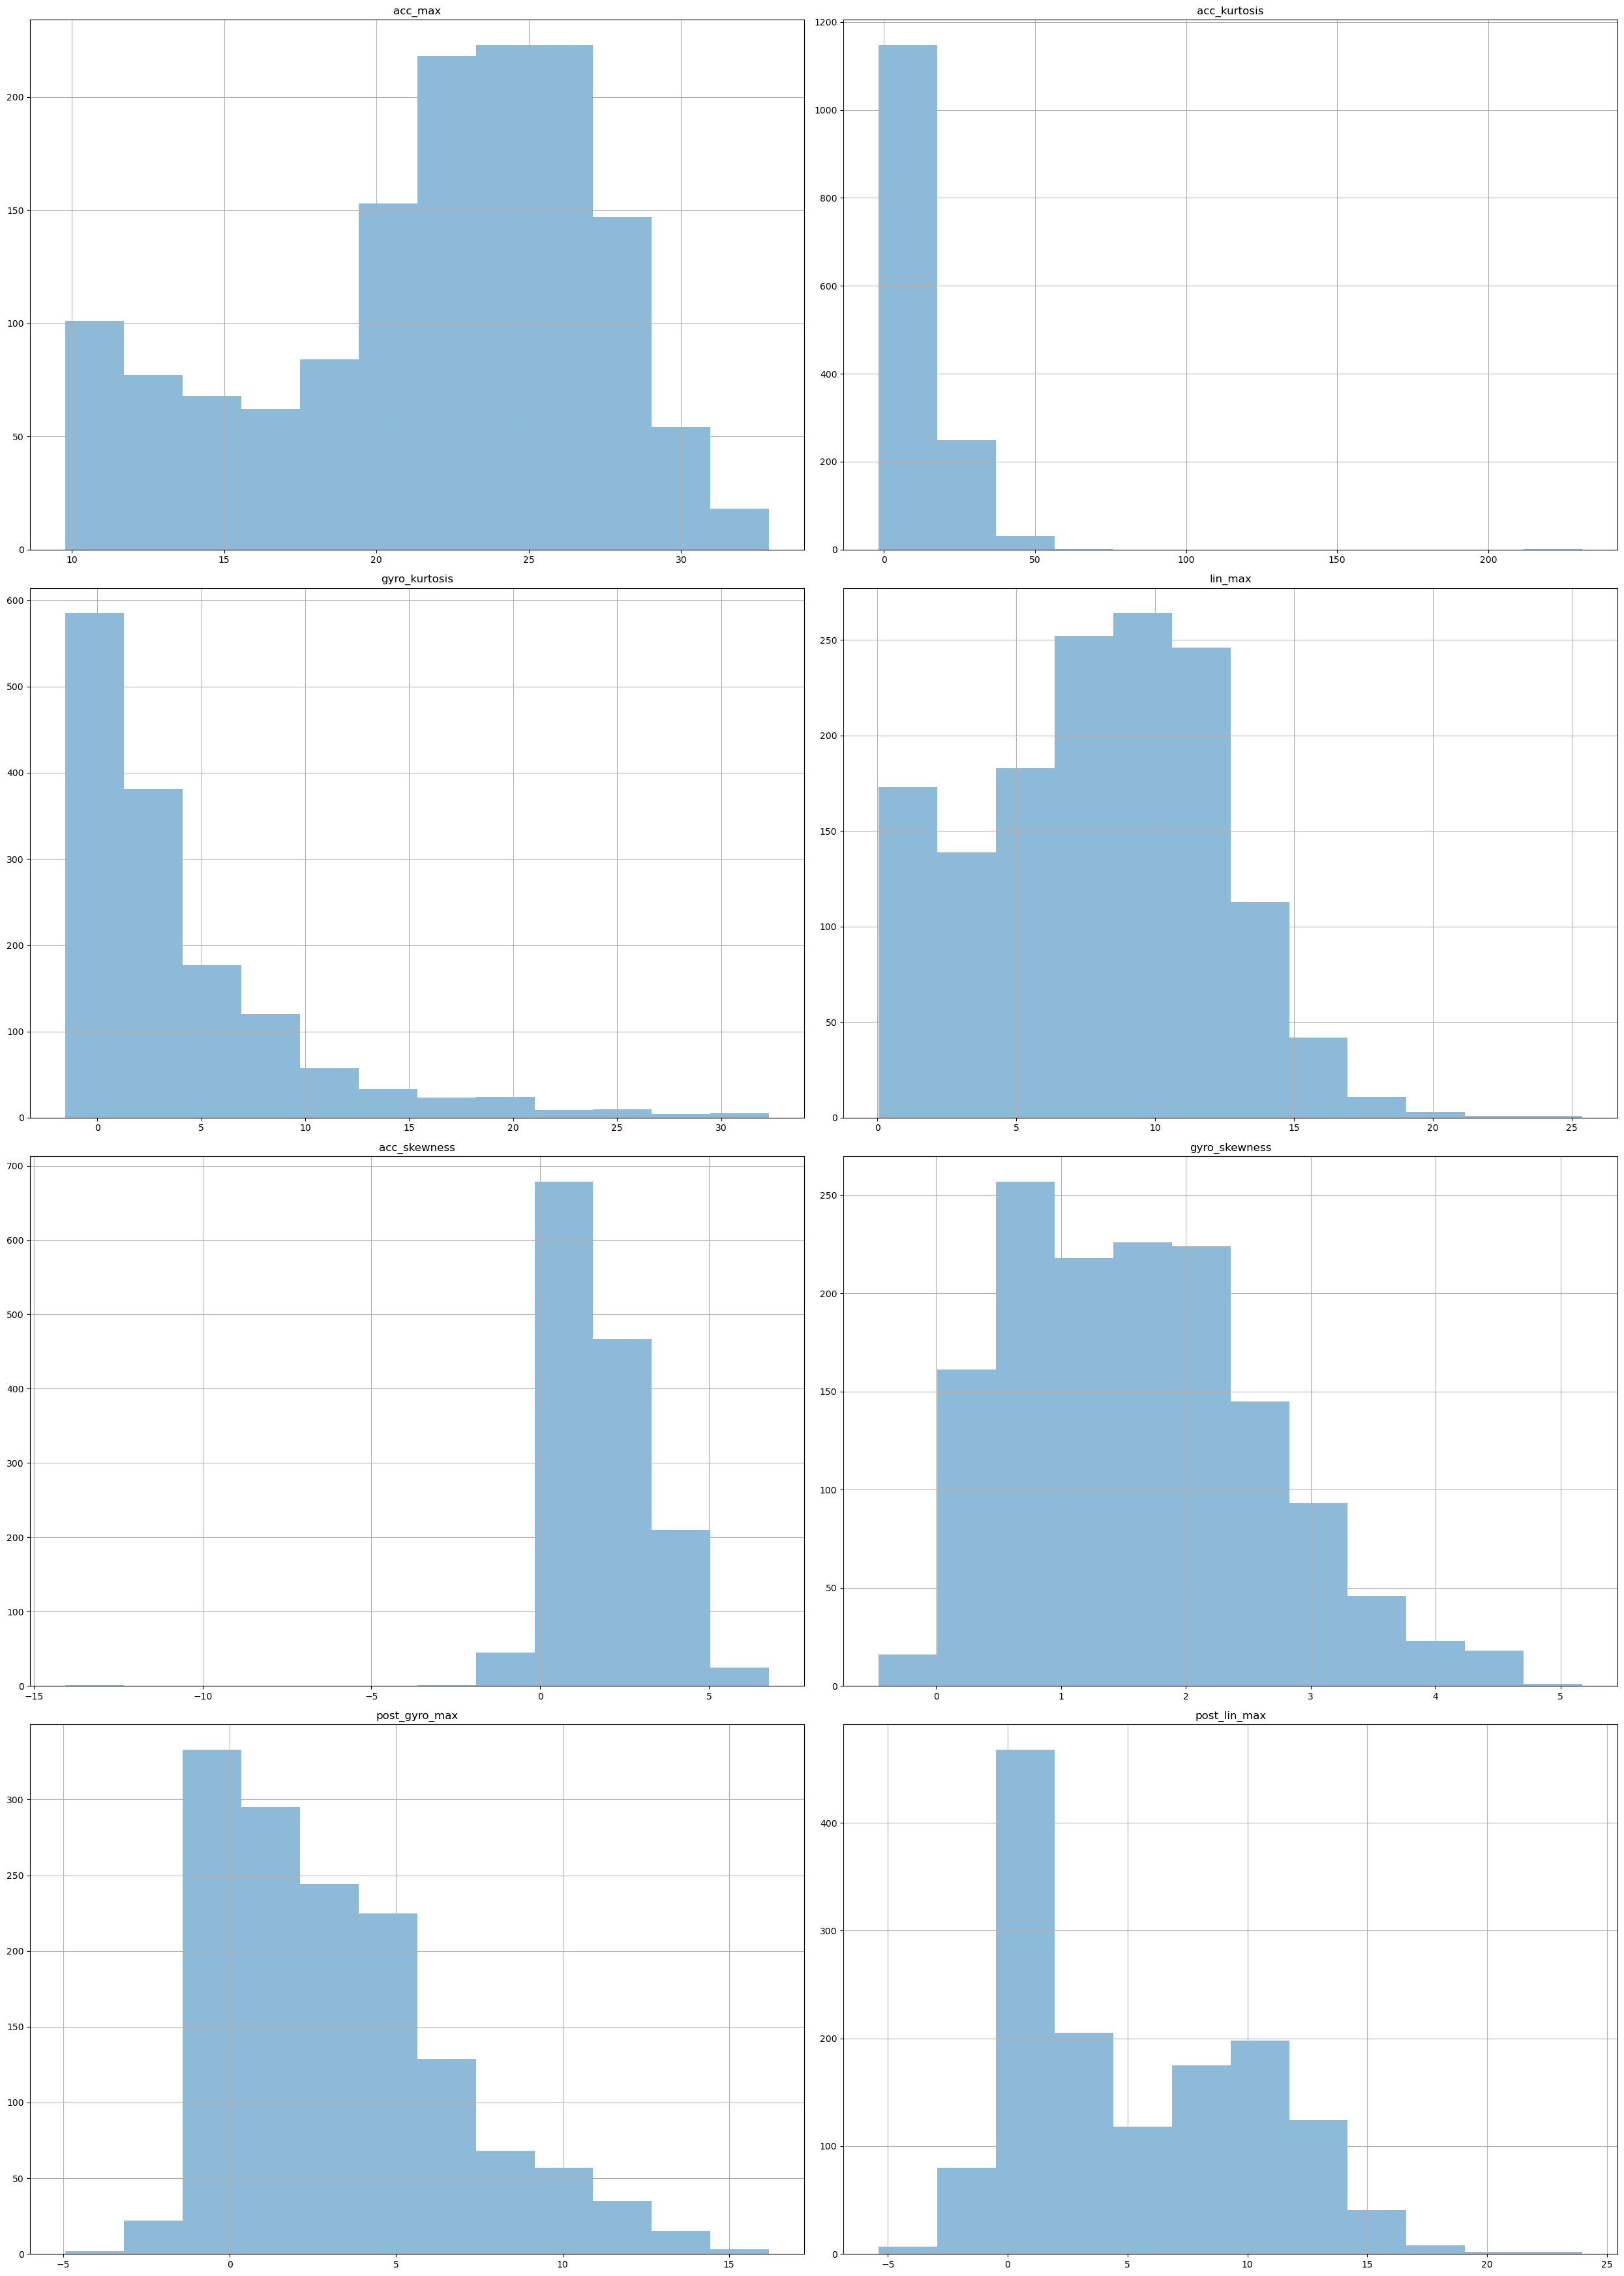

In [70]:
col = list(features.columns)
col
i =0 
j =0
fig, ax = plt.subplots(4,2, figsize = (25,35))
for colu in col:
    ax[j][i].set(title = colu)
    features[colu].hist(bins = 12, alpha =0.5, ax = ax[j][i])
    i+=1
    if (i%2 == 0):
        j+=1
        i =0
plt.tight_layout()

## almost the dataset is not be a scale => normalize

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
features

,acc_max,acc_kurtosis,gyro_kurtosis,lin_max,acc_skewness,gyro_skewness,post_gyro_max,post_lin_max
0,26.039919,20.378162,2.782476,11.131080,3.891361,1.592927,7.086618,10.790400
1,25.864500,14.187190,5.324864,7.945561,3.022175,2.376939,6.325522,7.719352
2,27.524501,31.855926,22.891186,14.454818,4.849024,4.283890,12.888111,14.368784
3,30.647705,23.608764,9.287735,15.228303,3.921537,2.794609,11.549971,14.944151
4,26.373917,14.318453,15.983202,10.007396,3.087975,3.363557,11.057636,9.753058
...,...,...,...,...,...,...,...,...
1423,9.997262,0.193545,0.022826,0.053063,0.003216,0.132977,0.001416,0.002612
1424,25.917910,-0.996787,0.637958,16.898301,0.199294,0.808652,3.385675,1.724883
1425,12.098892,1.745597,-0.874214,1.291914,-0.307109,0.424739,1.860753,0.861876
1426,20.079536,0.020741,-1.087583,6.476275,0.344870,0.311172,0.243046,0.995053
